SCIENCE.  
gully

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina' 
import warnings

### Read in the K2c02 data crossmatched with kplr

In [2]:
k2c2_yso_all_info = pd.read_csv('../analysis/K2C02_YSO_CLN_match.csv')

In [3]:
k2c2_yso_all_info.shape

(1678, 51)

In [4]:
k2c2_yso_all_info.columns

Index(['EPIC_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
       'logstd', 'logiqr', 'fname', 'input_id', 'id', 'k2_ra', 'k2_dec',
       'twomass', 'ucac', 'tyc', 'hip', 'kp', 'bmag', 'vmag', 'rmag', 'imag',
       'jmag', 'hmag', 'kmag', 'kepflag', 'sim_2MASS', 'MAIN_ID', 'RA', 'DEC',
       'RA_PREC', 'DEC_PREC', 'COO_ERR_MAJA', 'COO_ERR_MINA', 'COO_ERR_ANGLE',
       'COO_QUAL', 'COO_WAVELENGTH', 'COO_BIBCODE', 'OTYPE', 'ID', 'SP_TYPE',
       'SP_QUAL', 'SP_BIBCODE', 'FLUX_V', 'FLUX_I', 'FLUX_H', 'FLUX_K',
       'INPUT'],
      dtype='object')

In [5]:
k2_simbad = k2c2_yso_all_info

In [6]:
k2_simbad.OTYPE.unique()

array([nan, 'Star', 'RotV*', 'Candidate_YSO', 'X', 'TTau*', 'pMS*',
       '*inAssoc', 'brownD*', '**', 'RGB*', 'PulsV*delSct', '*inCl',
       'Orion_V*', 'Ae*', 'Em*', 'IR', 'Flare*', 'YSO', 'AGB*',
       'Candidate_brownD*', 'Candidate_TTau*', 'RotV*alf2CVn', 'BYDra',
       'V*', 'RSCVn', 'EB*Algol', 'Cepheid', 'SB*'], dtype=object)

### Plot fun with seaborn

We'll need a *control sample*, which we define as anything that was not proposed for specifically as an OPH/SCO target.

In [7]:
control = pd.read_csv('../analysis/K2C02_control_agg_data.csv')
cdf = control

In [8]:
tdf = k2_simbad[['EPIC_ID', 'sim_2MASS', 'MAIN_ID', 'logstd', 'logiqr', 'bmag', 'vmag', 'rmag', 'imag',
       'jmag', 'hmag', 'kmag', 'OTYPE', 'SP_TYPE', 'FLUX_V', 'FLUX_I', 'FLUX_H', 'FLUX_K'] ]

Does the `kplr` $H$ band mag match up with `Simbad` $H$ band mag?

In [9]:
#sns.lmplot('hmag', 'FLUX_H', data=tdf, line_kws={'alpha':0.3, 'color':'#EF0E03'})
#sns.lmplot('kmag', 'FLUX_K', data=tdf, line_kws={'alpha':0.3, 'color':'#EF0E03'})

Yes, they match up very well.  Good sanity check!

We need a new column to simply the object types.

In [10]:
tdf.SP_TYPE.unique()

array([nan, 'F3V', 'G8IV(e)', 'K1III:', 'G8IV', 'A0', 'A0V', 'K0IV(e)',
       'G0V', 'K1V(e)', 'A6IV', 'M6', 'F5V', 'A3V', 'G2IV', 'M5.5', 'A1V',
       'K7Ve', 'K5e', 'F6V', 'K0/K1III:', 'F5', 'G9V(e)', 'M2', 'B9V',
       'K7', 'M0', 'F2V', 'F9V', 'A9V+...', 'B8II', 'G1', 'M1', 'A5IV',
       'G8V', 'M5', 'A2m...', 'M3.5', 'M5-6', 'K5V(e)', 'B5III', 'K5',
       'M4.5', 'B8V', 'A2V', 'M4.75', 'M3', 'K3', 'K0', 'F4V', 'M3.75',
       'Me', 'G5', 'M4', 'G4', 'K6', 'K2', 'K1', 'K3/M0e', 'B5V', 'M4.25',
       'A5IV/V', 'M6.5', 'K8', 'K4/M2.5e', 'K4', 'F7V', 'M2.5', 'M6.0',
       'M5.25', 'M8', 'K3:', 'K9', 'M4III', 'M8.5', 'M7.5', 'G9', 'M5III',
       'M7', 'B7Vv...', 'M2III', 'M2e', 'B2III/IV', 'M0.5', 'G9V', 'M6.25',
       'A7', 'B6IV', 'M3.25', 'G7', 'B4', 'K0:', 'G0', 'A1III/IV', 'K0e',
       'K0:Ve', 'B9IIv...', 'G3', 'F2', 'M4.25IIIC', 'G3.5', 'M4.5III',
       'M0:', 'F3.5', 'M3.5III', 'F3', 'F0V', 'M5.0', 'M1.5', 'G3V',
       'M5.75', 'G9IV', 'M7.00', 'M9.00', 'B8/B9III', 

We have to ignore the omnipresent "set dataframe copy warning".

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    tdf['Spectral Type'] = 'Other'

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    tdf['Spectral Type'][tdf.SP_TYPE != tdf.SP_TYPE] = 'Unknown'
    tdf['Spectral Type'][tdf.SP_TYPE.str.contains('K') == True] = 'K'
    tdf['Spectral Type'][tdf.SP_TYPE.str.contains('M') == True] = 'M'

In [13]:
tdf['Spectral Type'].unique()

array(['Unknown', 'Other', 'K', 'M'], dtype=object)

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


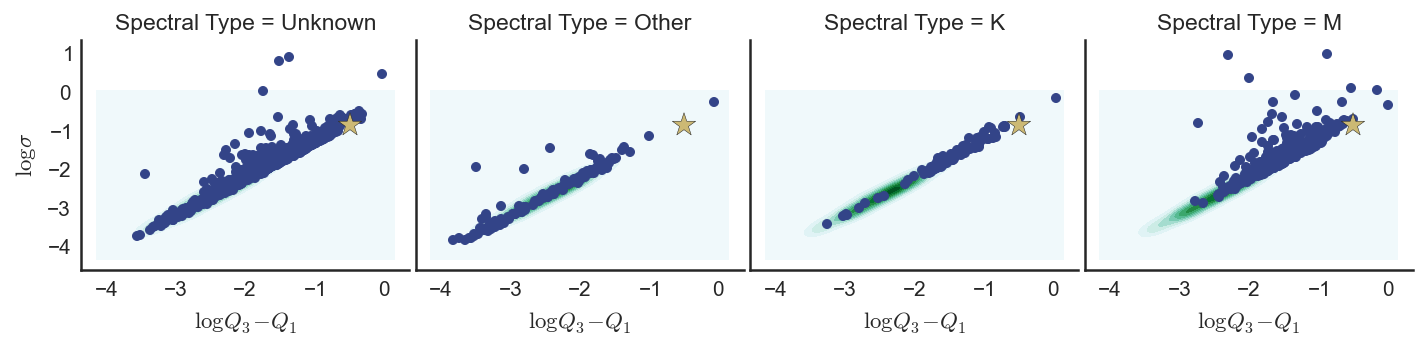

In [39]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tdf, col="Spectral Type", margin_titles=True, size=2.5)
for i in range(4):
    this_ax = g.facet_axis(0, i)
    sns.kdeplot(cdf.logiqr, cdf.logstd, shade=True, ax=this_ax)
g.map(plt.scatter, "logiqr", "logstd", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("$\log{Q_3-Q_1}$", "$\log{\sigma}$");
g.set(xticks=[-4, -3, -2, -1, 0], yticks=[-4, -3, -2, -1, 0, 1, 2]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);
for i in range(4):
    this_ax = g.facet_axis(0, i)
    this_ax.scatter([-0.489], [-0.787], s=150, marker='*', c='y')
plt.savefig('K2cycle2_YSO_variability.pdf', bbox_inches='tight')

In [15]:
tdf.OTYPE.unique()

array([nan, 'Star', 'RotV*', 'Candidate_YSO', 'X', 'TTau*', 'pMS*',
       '*inAssoc', 'brownD*', '**', 'RGB*', 'PulsV*delSct', '*inCl',
       'Orion_V*', 'Ae*', 'Em*', 'IR', 'Flare*', 'YSO', 'AGB*',
       'Candidate_brownD*', 'Candidate_TTau*', 'RotV*alf2CVn', 'BYDra',
       'V*', 'RSCVn', 'EB*Algol', 'Cepheid', 'SB*'], dtype=object)

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    tdf['Object Type'] = 'Other'

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    tdf['Object Type'][tdf.OTYPE != tdf.OTYPE] = 'Unknown'
    
    yso = ((tdf.OTYPE == 'TTau*') | (tdf.OTYPE == 'pMS*') | (tdf.OTYPE == '*inAssoc') |
           (tdf.OTYPE == '*inCl') | (tdf.OTYPE == 'Ae*') | (tdf.OTYPE == 'YSO') )
           
    var_star = ((tdf.OTYPE == 'V*') | (tdf.OTYPE == b'RotV*') |
                (tdf.OTYPE == 'Orion_V*') | (tdf.OTYPE == 'PulsV*delSct') |
                (tdf.OTYPE == 'RSCVn') | (tdf.OTYPE == 'EB*Algol') |
                (tdf.OTYPE == 'Cepheid') | (tdf.OTYPE == 'RotV*alf2CVn') )
    
    tdf['Object Type'][yso] = 'Young Star'
    tdf['Object Type'][var_star] = 'Variable Star'
    #tdf['Object Type'][tdf.OTYPE == b'Flare*'] = 'Flare Star'
    
    #tdf['Object Type'][tdf.OTYPE == b'TTau*'] = 'T-Tauri Star'
    #tdf['Object Type'][tdf.OTYPE.str.contains(b'RSCVn') == True] = 'RS CVn Variable'                
    #tdf['Object Type'][] = 'Variable Star'

In [18]:
tdf['Object Type'].unique()

array(['Unknown', 'Other', 'Young Star', 'Variable Star'], dtype=object)

### Overplot the control sample!

In [19]:
sns.set(color_codes=True)

In [20]:
cmap_blue = sns.light_palette("blue", as_cmap=True)
pal_blue = sns.light_palette("blue")
cmap_red = sns.light_palette("red", as_cmap=True)
pal_red = sns.light_palette("red")

In [21]:
sns.set_context('talk', font_scale=1.3)

In [24]:
tdf.logiqr.dropna(inplace=True)
tdf.logstd.dropna(inplace=True)

//anaconda/lib/python3.4/site-packages/pandas/core/series.py:2546: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


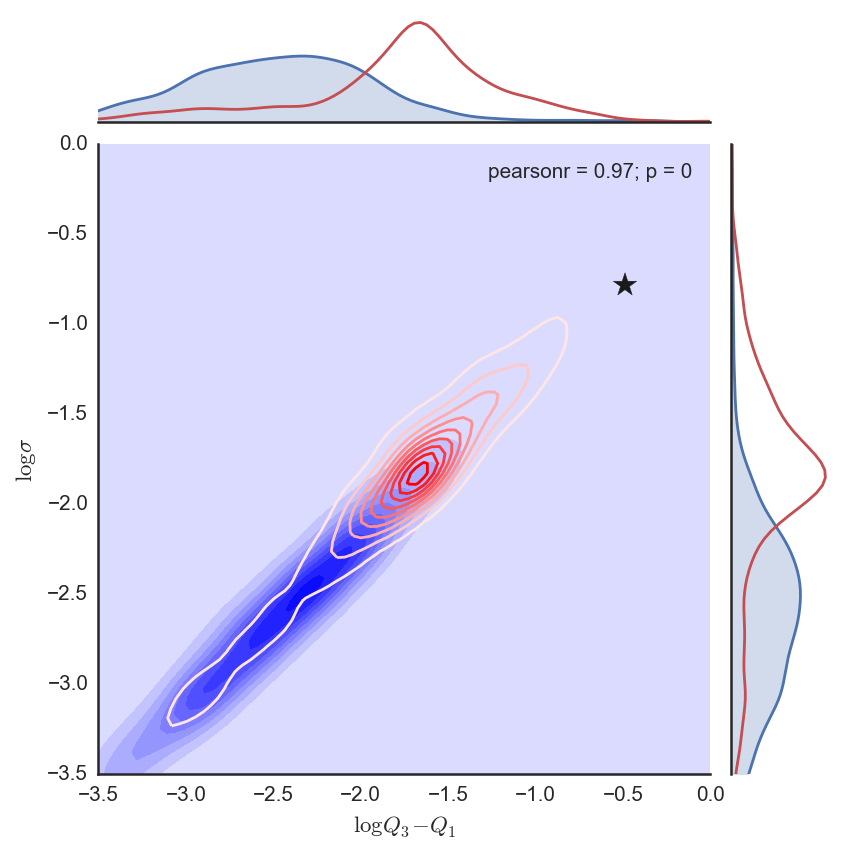

In [34]:
with sns.axes_style("white"):
    tp = sns.jointplot('logiqr', 'logstd', data=cdf, kind='kde', cmap=cmap_blue,
                       xlim=(-3.5, 0), ylim=(-3.5, 0), )
    sns.kdeplot(tdf.logiqr, tdf.logstd, shade=False, ax=tp.ax_joint, cmap=cmap_red)
    sns.distplot(tdf.logiqr, hist=False, ax=tp.ax_marg_x, color='r');
    tp.ax_marg_x.get_xaxis().set_visible(False)
    tp.ax_marg_y.get_yaxis().set_visible(False)
    sns.distplot(tdf.logstd, hist=False, ax=tp.ax_marg_y, color='r', vertical=True);
    #LkCa4 amplitude from Grankin et al. 2008
    tp.set_axis_labels("$\log{Q_3-Q_1}$", "$\log{\sigma}$");
    tp.ax_joint.scatter([-0.489], [-0.787], s=150, marker='*', c='k')
    
plt.savefig('../talk/figures/K2_YSO_variability_overview.pdf')

In [26]:
sns.set_context('paper', font_scale=1.3)

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


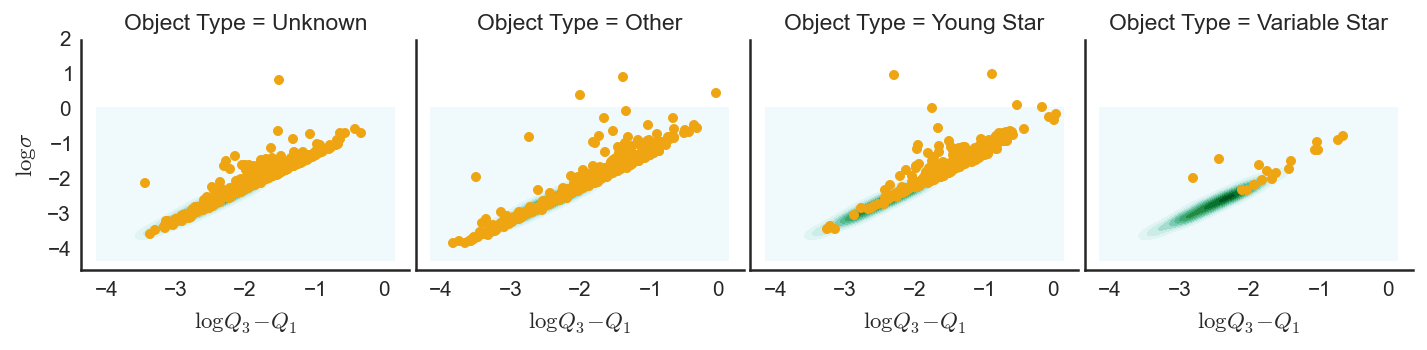

In [29]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tdf, col="Object Type", margin_titles=True, size=2.5)
#g.map(sns.kdeplot, 'logiqr', 'logstd', shade=True)
for i in range(4):
    this_ax = g.facet_axis(0, i)
    #sns.kdeplot(tdf.logiqr, tdf.logstd, shade=False, ax=this_ax)
    sns.kdeplot(cdf.logiqr, cdf.logstd, shade=True, ax=this_ax)
g.map(plt.scatter, "logiqr", "logstd", color="#EEa511", edgecolor="white", lw=.5);

g.set_axis_labels("$\log{Q_3-Q_1}$", "$\log{\sigma}$");
g.set(xticks=[-4, -3, -2, -1, 0], yticks=[-4, -3, -2, -1, 0, 1, 2]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);
plt.savefig('../talk/figures/K2_YSO_variability_Otype.pdf')

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


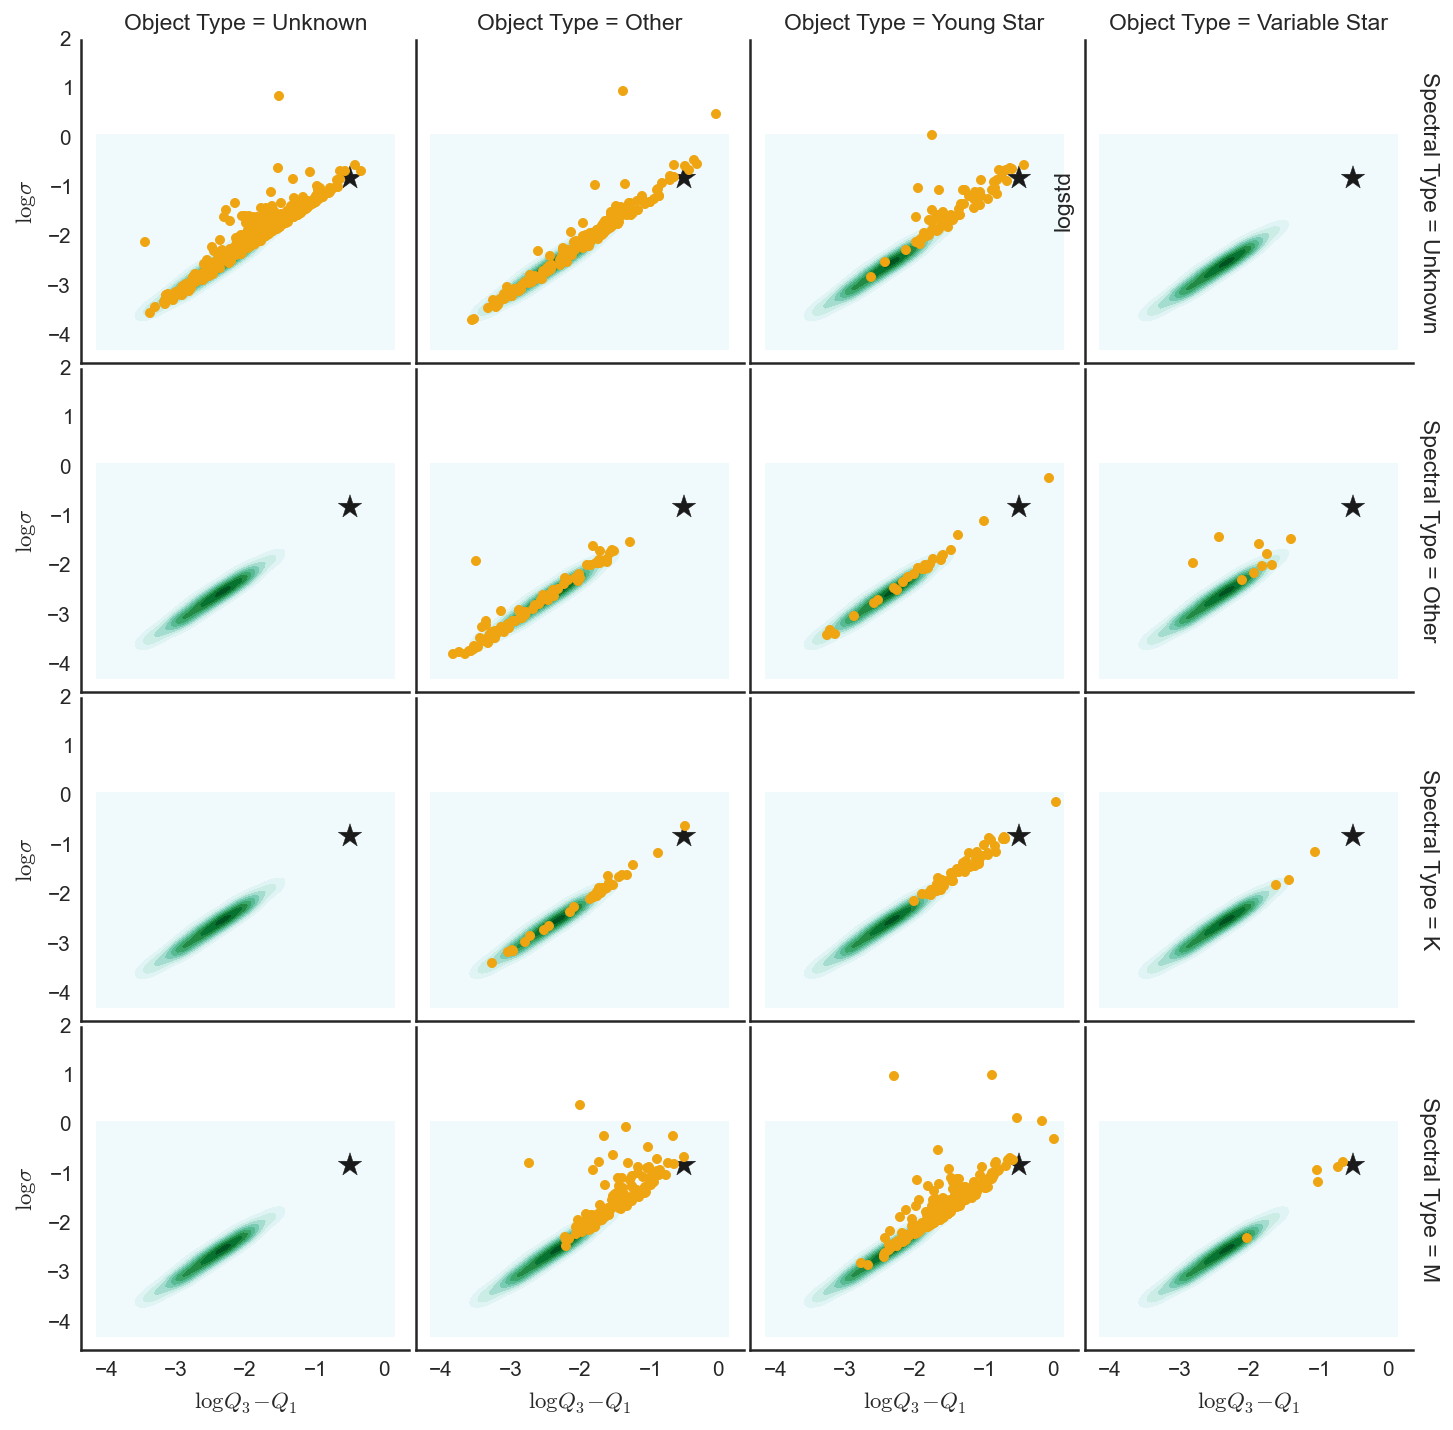

In [30]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tdf, row='Spectral Type', col="Object Type", margin_titles=True, size=2.5)
for j in range(4):
    for i in range(4):
        this_ax = g.facet_axis(i, j)
        sns.kdeplot(cdf.logiqr, cdf.logstd, shade=True, ax=this_ax)
        this_ax.scatter([-0.489], [-0.787], s=150, marker='*', c='k')
g.map(plt.scatter, "logiqr", "logstd", color="#EEa511", edgecolor="white", lw=.5);

g.set_axis_labels("$\log{Q_3-Q_1}$", "$\log{\sigma}$");
g.set(xticks=[-4, -3, -2, -1, 0], yticks=[-4, -3, -2, -1, 0, 1, 2]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);
plt.savefig('../talk/figures/K2_YSO_variability_spec_and_Otype.pdf')

Awesome!

In [ ]:
tdf['Object Type'].unique()

In [ ]:
cands = ((tdf['logiqr'] > -0.8) &
      (tdf['logiqr'] < -0.3) &
      (tdf['logstd'] < (tdf.logiqr + np.log10(0.50) +0.15)) &
      (tdf['Spectral Type'] == 'M') &
      (tdf.hmag < 11.0) &
      (tdf.kmag < 11.0) )


with sns.axes_style("white"):
    sns.kdeplot(cdf.logiqr, cdf.logstd, shade=True, cmap=cmap_blue)
    sns.kdeplot(tdf.logiqr, tdf.logstd, shade=False, cmap=cmap_red)
    plt.scatter([-0.489], [-0.787], s=150, marker='*', c='k')
    plt.scatter(tdf.logiqr[cands], tdf.logstd[cands], color="#EEa511", edgecolor="white", lw=.5);
    plt.xlim(-1.3, 0)
    plt.ylim(-1.3, -0.4)
    
    math_x = np.linspace(-4, 0.5, num=50)
    math_y = math_x + np.log10(0.50)
    plt.plot(math_x, math_y, 'k--', alpha=0.5)
    plt.plot(math_x, math_y+0.15, 'w--', alpha=0.5)
    
#g.set_axis_labels("$\log{Q_3-Q_1}$", "$\log{\sigma}$");
#g.set(xticks=[-4, -3, -2, -1, 0], yticks=[-4, -3, -2, -1, 0, 1, 2]);
#g.fig.subplots_adjust(wspace=.02, hspace=.02);

The end.